In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体，解决Matplotlib中文乱码问题
plt.rcParams['axes.unicode_minus']=False # 解决Matplotlib坐标轴负号'-'显示为方块的问题

校准

In [3]:
#每种频率情况下抽后1/4的数据点拼接
def selection(x, y):
    order, final, address, marker = [], [], 0, x[0]
    for i in range(len(x)):
        if x[i] != marker :
            address, marker = i-1, x[i];
            for j in range(address-25, address):
                order.append(x[j])
                final.append(y[j])
    return order, final

In [4]:
#每种频率情况下抽后1/4的数据点拼接，再在每点取平均值
def selection_mean(x, y):
    tmp, order, final, address, marker = 0, [], [], 0, x[0]
    for i in range(len(x)):
        if x[i] != marker :
            address, marker = i-1, x[i];
            order.append(x[i-1])
            final.append(np.mean([y[x] for x in range(address-25, address)]))
            tmp = 0
    return order, final

In [5]:
df_1 = pd.read_excel(r'C:\Users\31260\Desktop\近代物理实验\D1 锁相放大器与弱信号测量实验\D1-2\1ohm精密电阻.xlsx')
dt_1 = df_1.head(10010)

In [6]:
f, theta_1 = selection_mean(dt_1['Freq'], dt_1['θ'])
f, r_1 = selection_mean(dt_1['Freq'], dt_1['R'])

In [7]:
np.mean(r_1[:])

0.011821557525773197

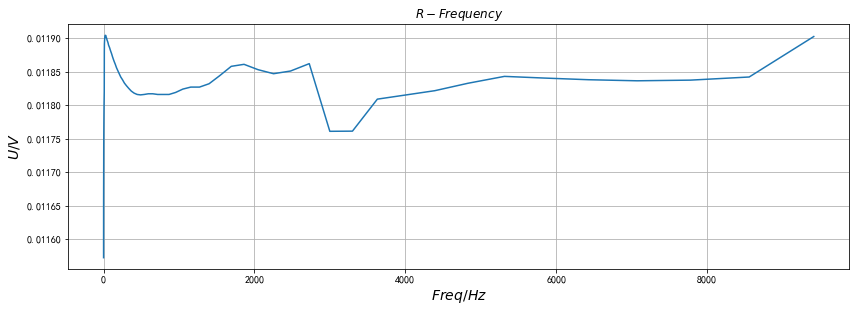

In [8]:
plt.subplots(figsize = (14, 4.5))
plt.plot(f, r_1)

plt.title(r'$R-Frequency$')
plt.ylabel(r'$U/V$', fontsize = 14)
plt.xlabel(r'$Freq/Hz$', fontsize  =14)
plt.grid()
plt.show()

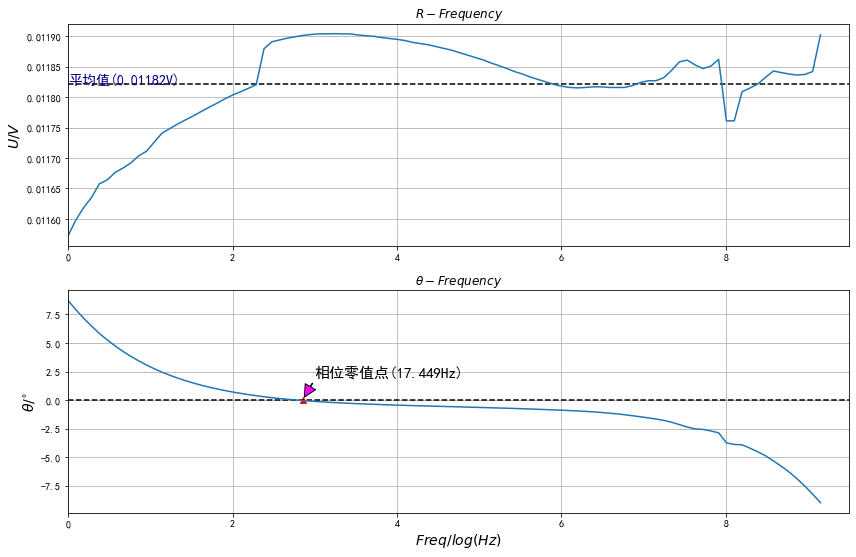

In [9]:
Fq = [np.log(x) for x in f] ##坐标对数化
fig, axs = plt.subplots(2, 1, figsize = (14, 9))

axs[0].set_title(r'$R-Frequency$')
axs[0].plot(Fq, r_1)
r_m = np.mean(r_1[:])
axs[0].hlines(r_m, 0, 9.5, ls = '--')
axs[0].text(0, r_m, '平均值({:.5f}V)'.format(r_m), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$U/V$', fontsize = 14)
axs[0].set_xlim(0, 9.5)
axs[0].grid()

axs[1].set_title(r'$\theta - Frequency$')
axs[1].plot(Fq, theta_1)
axs[1].set_ylabel(r'$\theta/^{\circ}$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
axs[1].hlines(0, 0, 10, ls = '--')
axs[1].scatter(np.log(17.449), 0, marker = '^', c = 'red')
axs[1].annotate("相位零值点(17.449Hz)", fontsize = 15, xytext = (3, 2), xy=(np.log(17.449), 0.1),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
axs[1].grid()
axs[1].set_xlim(0, 9.5)
plt.show()

转换电阻

In [10]:
df_o = pd.read_excel(r'C:\Users\31260\Desktop\近代物理实验\D1 锁相放大器与弱信号测量实验\D1-2\顺绕\实验2 电阻.xlsx')
dt_o = df_o.head(10010)

In [11]:
f, theta_o = selection_mean(dt_o['Freq'], dt_o['θ'])
f, r_o = selection_mean(dt_o['Freq'], dt_o['R'])

In [12]:
for i in range(len(theta_o)):
    if theta_o[i] < 0:
        theta_o[i] += 360 #锁相放大器的显示原因，当为过来-2pi时需要调整加2pi

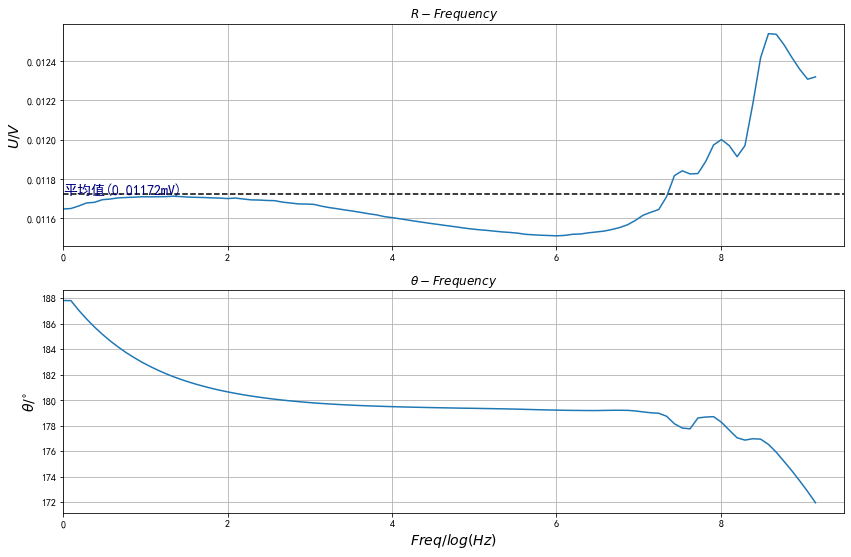

In [13]:
fl = [np.log(x) for x in f] ##坐标对数化
fig, axs = plt.subplots(2, 1, figsize = (14, 9))

axs[0].set_title(r'$R-Frequency$')
axs[0].plot(fl, r_o)
r_om = np.mean(r_o)
axs[0].hlines(r_om, 0, 9.5, ls = '--')
axs[0].text(0, r_om, '平均值({:.5f}mV)'.format(r_om), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$U/V$', fontsize = 14)
axs[0].set_xlim(0, 9.5)
axs[0].grid()

axs[1].set_title(r'$\theta - Frequency$')
axs[1].plot(fl, theta_o)
axs[1].set_ylabel(r'$\theta/^{\circ}$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
#axs[1].hlines(0, 0, 10, ls = '--')
#axs[1].scatter(np.log(17.449), 0, marker = '^', c = 'red')
#axs[1].annotate("相位零值点(17.449Hz)", fontsize = 15, xytext = (3, 2), xy=(np.log(17.449), 0.1),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
axs[1].grid()
axs[1].set_xlim(0, 9.5)
plt.show()

转换电阻修正

In [14]:
theta_f = []
for i in range(len(theta_o)):
    q = theta_o[i] - theta_1[i]
    if q < 0:
        theta_f.append(q+360) #锁相放大器的显示原因，当为过来-2pi时需要调整加2pi
    else:
        theta_f.append(q)

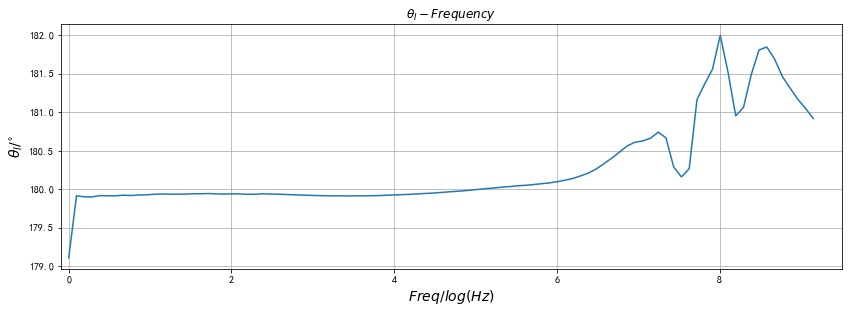

In [15]:
plt.subplots(figsize = (14, 4.5))
plt.plot(fl, theta_f)

plt.title(r'$\theta_I-Frequency$')
plt.ylabel(r'$\theta_I/^{\circ}$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)

plt.xlim(-0.1, 9.5)
plt.grid()
plt.show()

顺绕

In [16]:
df_s = pd.read_excel(r'C:\Users\31260\Desktop\近代物理实验\D1 锁相放大器与弱信号测量实验\D1-2\顺绕\实验2 顺绕电阻.xlsx')
dt_s = df_s.head(10010)

In [17]:
f, theta_s = selection_mean(dt_s['Freq'], dt_s['θ'])
f, r_s = selection_mean(dt_s['Freq'], dt_s['R'])

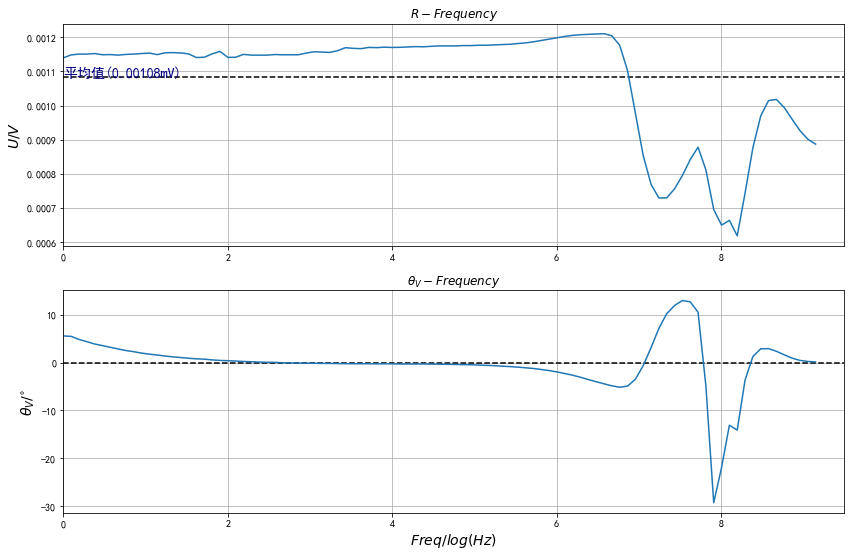

In [18]:
fl = [np.log(x) for x in f] ##坐标对数化
fig, axs = plt.subplots(2, 1, figsize = (14, 9))

axs[0].set_title(r'$R-Frequency$')
axs[0].plot(fl, r_s)
r_sm = np.mean(r_s)
axs[0].hlines(r_sm, 0, 9.5, ls = '--')
axs[0].text(0, r_sm, '平均值({:.5f}mV)'.format(r_sm), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$U/V$', fontsize = 14)
axs[0].set_xlim(0, 9.5)
axs[0].grid()

axs[1].set_title(r'$\theta_V - Frequency$')
axs[1].plot(fl, theta_s)
axs[1].set_ylabel(r'$\theta_V/^{\circ}$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
axs[1].hlines(0, 0, 10, ls = '--')
#axs[1].scatter(np.log(17.449), 0, marker = '^', c = 'red')
#axs[1].annotate("相位零值点(17.449Hz)", fontsize = 15, xytext = (3, 2), xy=(np.log(17.449), 0.1),arrowprops={'shrink':0.1, 'width':0.5, 'facecolor':'magenta'})
axs[1].grid()
axs[1].set_xlim(0, 9.5)
plt.show()

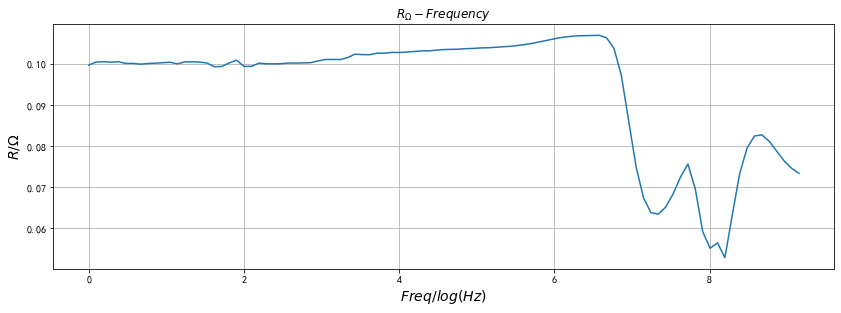

In [19]:
#阻抗计算
Rs = []
for i in range(len(theta_s)):
    Rs.append(r_s[i]/(r_o[i]/1.02))
plt.subplots(figsize = (14, 4.5))
plt.plot(fl, Rs)

plt.title(r'$R_{\Omega}-Frequency$')
plt.ylabel(r'$R/\Omega$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.grid()
plt.show()

In [20]:
#电压相位差与电流相位差
delta_theta_s = []
for i in range(len(theta_s)):
    delta_theta_s.append(theta_s[i] - theta_f[i])

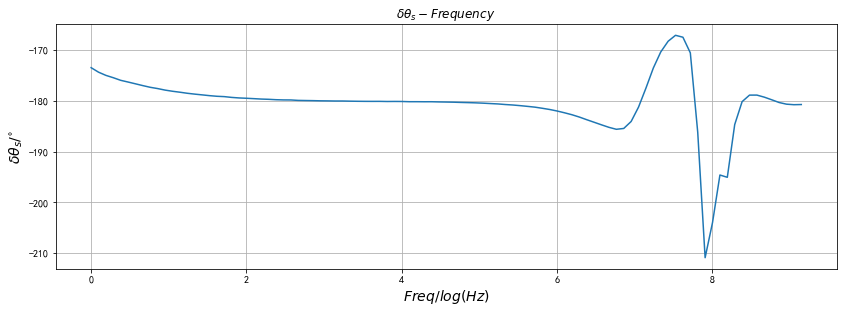

In [21]:
plt.subplots(figsize = (14, 4.5))
plt.plot(fl, delta_theta_s)

plt.title(r'$\delta\theta_s-Frequency$')
plt.ylabel(r'$\delta\theta_s/^{\circ}$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.grid()
plt.show()

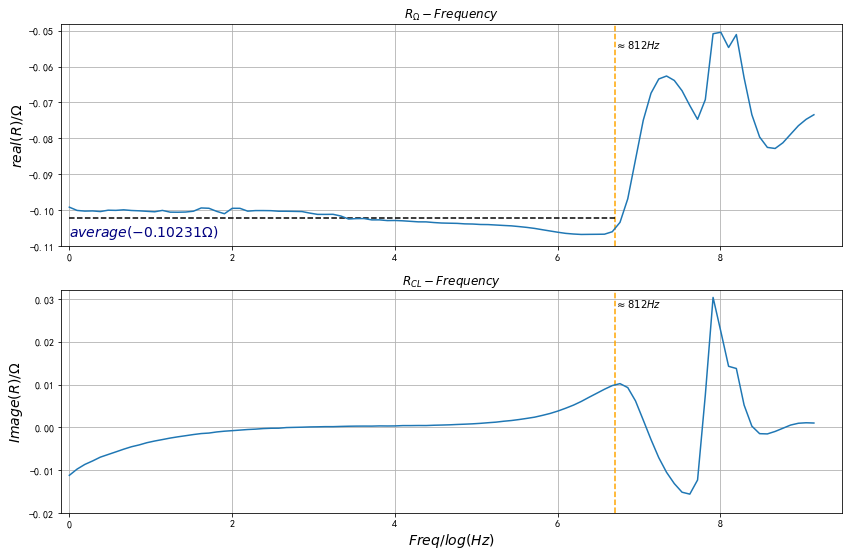

In [22]:
#电阻及容、感抗计算
R_Os, R_CLs = [], []
for i in range(len(theta_s)):
    R_Os.append(Rs[i]*np.cos(delta_theta_s[i]/180*np.pi))  #numpy包的三角函数计算默认是rad！！！
    R_CLs.append(Rs[i]*np.sin(delta_theta_s[i]/180*np.pi))
    
fig, axs = plt.subplots(2, 1, figsize = (14, 9))
axs[0].set_title(r'$R_{\Omega}-Frequency$')
axs[0].plot(fl, R_Os)
axs[0].text( 6.7, -0.055, r'$\approx 812Hz$')
axs[0].vlines(6.7, -0.11, -0.048, ls = '--', colors = 'orange')
r_nm = np.mean(R_Os[0:71])
axs[0].hlines(r_nm, 0, 6.7, ls = '--')
axs[0].text(0, r_nm-0.005, r'$average({:.5f}\Omega)$'.format(r_nm), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$real(R)/\Omega$', fontsize = 14)
axs[0].set_xlim(-0.1, 9.5); axs[0].set_ylim(-0.11, -0.048)
axs[0].grid()

axs[1].set_title(r'$R_{CL} - Frequency$')
axs[1].plot(fl, R_CLs)
axs[1].set_ylabel(r'$Image(R)/\Omega$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
axs[1].vlines(6.7, -0.02, 0.032, ls = '--', colors = 'orange')
axs[1].text( 6.7, 0.028, r'$\approx 812Hz$')
axs[1].grid()
axs[1].set_xlim(-0.1, 9.5); axs[1].set_ylim(-0.02, 0.032)

plt.show()

$Z=2\pi fL-\frac{1}{2\pi f C}$

In [23]:
#定义阻抗计算式
##注意常数的顺序哈。。。
def f_Omega(x, l, c):
    return 2*np.pi*(np.e**x)*l - 1/((2*np.pi*np.e**x)*c)

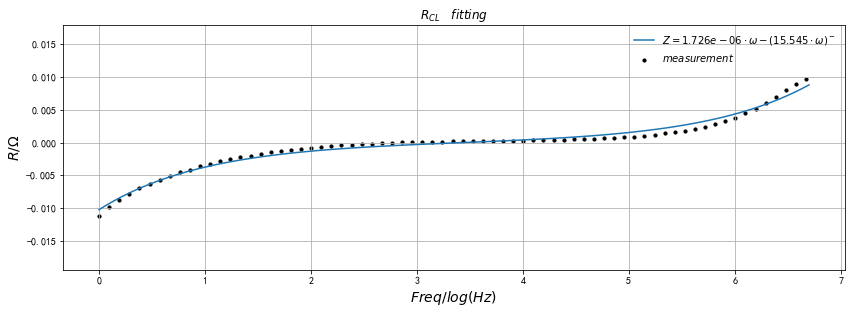

In [24]:
#拟合计算出阻抗
popt, pcov = curve_fit(f_Omega, fl[0:71], R_CLs[0:71], maxfev = 600)# , bounds =([1e-4, 0], [10, 1e-3])

plt.subplots(figsize = (14, 4.5))
f_dense = np.linspace(0, 6.7, 100)
plt.scatter(fl[0:71], R_CLs[0:71],  c = 'k', s = 10, label = r'$measurement$')
plt.plot(f_dense, f_Omega(f_dense, popt[0], popt[1]), label = r'$Z = {:.3e}\cdot \omega - ({:.3f}\cdot \omega)^-$'.format(popt[0], popt[1]))

plt.title(r'$R_{CL}\quad fitting$')
plt.ylabel(r'$R/\Omega$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.legend(frameon = False)
plt.grid()
plt.show()

逆绕

In [25]:
df_n = pd.read_excel(r'C:\Users\31260\Desktop\近代物理实验\D1 锁相放大器与弱信号测量实验\D1-2\逆绕\实验2 逆绕电阻.xlsx')
dt_n = df_n.head(10010)

In [26]:
f, theta_n = selection_mean(dt_n['Freq'], dt_n['θ'])
f, r_n = selection_mean(dt_n['Freq'], dt_n['R'])

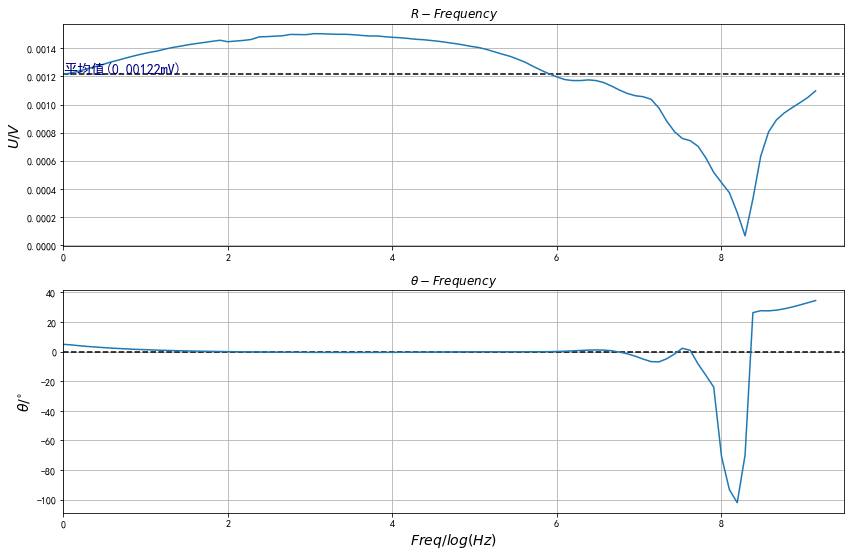

In [27]:
fl = [np.log(x) for x in f] ##坐标对数化
fig, axs = plt.subplots(2, 1, figsize = (14, 9))

axs[0].set_title(r'$R-Frequency$')
axs[0].plot(fl, r_n)
r_nm = np.mean(r_n)
axs[0].hlines(r_nm, 0, 9.5, ls = '--')
axs[0].text(0, r_nm, '平均值({:.5f}mV)'.format(r_nm), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$U/V$', fontsize = 14)
axs[0].set_xlim(0, 9.5)
axs[0].grid()

axs[1].set_title(r'$\theta - Frequency$')
axs[1].plot(fl, theta_n)
axs[1].set_ylabel(r'$\theta/^{\circ}$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
axs[1].hlines(0, 0, 10, ls = '--')
axs[1].grid()
axs[1].set_xlim(0, 9.5)
plt.show()

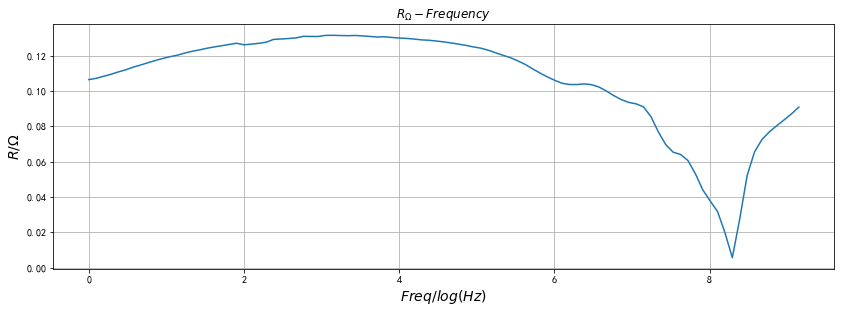

In [28]:
#阻抗计算
Rn = []
for i in range(len(theta_s)):
    Rn.append(r_n[i]/(r_o[i]/1.02))
plt.subplots(figsize = (14, 4.5))
plt.plot(fl, Rn)

plt.title(r'$R_{\Omega}-Frequency$')
plt.ylabel(r'$R/\Omega$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.grid()
plt.show()

In [29]:
#电压相位差与电流相位差
delta_theta_n = []
for i in range(len(theta_n)):
    delta_theta_n.append(theta_n[i] - theta_f[i])

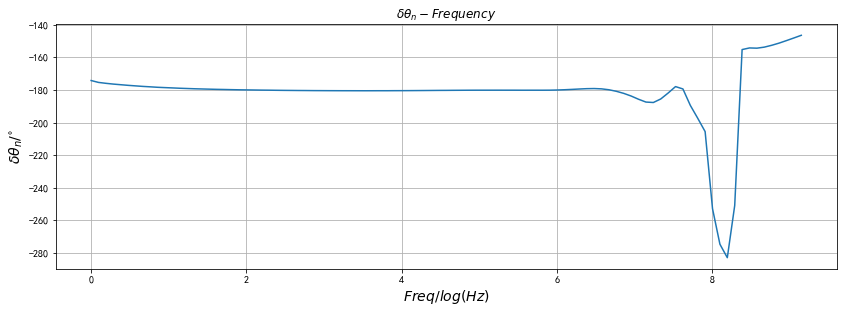

In [30]:
plt.subplots(figsize = (14, 4.5))
plt.plot(fl, delta_theta_n)

plt.title(r'$\delta\theta_n-Frequency$')
plt.ylabel(r'$\delta\theta_n/^{\circ}$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.grid()
plt.show()

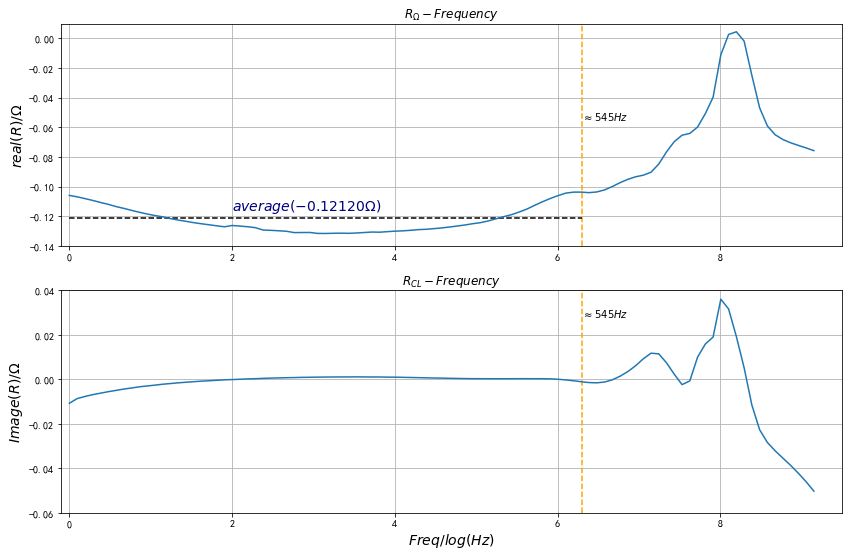

In [34]:
#电阻及容、感抗计算
R_On, R_CLn = [], []
for i in range(len(theta_s)):
    R_On.append(Rn[i]*np.cos(delta_theta_n[i]/180*np.pi))  #numpy包的三角函数计算默认是rad！！！
    R_CLn.append(Rn[i]*np.sin(delta_theta_n[i]/180*np.pi))
    
fig, axs = plt.subplots(2, 1, figsize = (14, 9))
axs[0].set_title(r'$R_{\Omega}-Frequency$')
axs[0].plot(fl, R_On)
axs[0].text( 6.3, -0.055, r'$\approx 545Hz$')
axs[0].vlines(6.3, -0.14, 0.01, ls = '--', colors = 'orange')
r_nm = np.mean(R_On[0:71])
axs[0].hlines(r_nm, 0, 6.3, ls = '--')
axs[0].text(2, r_nm+0.005, r'$average({:.5f}\Omega)$'.format(r_nm), c = 'navy', fontsize = 14)
axs[0].set_ylabel(r'$real(R)/\Omega$', fontsize = 14)
axs[0].set_xlim(-0.1, 9.5);  axs[0].set_ylim(-0.14, 0.01)
axs[0].grid()

axs[1].set_title(r'$R_{CL} - Frequency$')
axs[1].plot(fl, R_CLn)
axs[1].set_ylabel(r'$Image(R)/\Omega$', fontsize = 14)
axs[1].set_xlabel(r'$Freq/log(Hz)$', fontsize  =14)
axs[1].vlines(6.3, -0.06, 0.04, ls = '--', colors = 'orange')
axs[1].text( 6.3, 0.028, r'$\approx 545Hz$')
axs[1].grid()
axs[1].set_xlim(-0.1, 9.5); axs[1].set_ylim(-0.06, 0.04)

plt.show()

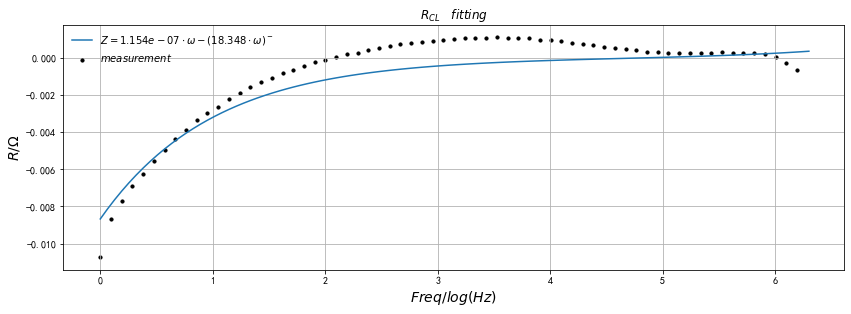

In [35]:
#拟合计算出阻抗
popt, pcov = curve_fit(f_Omega, fl[0: 67], R_CLn[0: 67], maxfev = 600)

plt.subplots(figsize = (14, 4.5))
f_dense = np.linspace(0, 6.3, 100)
plt.plot(f_dense, f_Omega(f_dense, popt[0], popt[1]), label = r'$Z = {:.3e}\cdot \omega - ({:.3f}\cdot \omega)^-$'.format(popt[0], popt[1]))
plt.scatter(fl[0:66], R_CLn[0:66],  c = 'k', s = 10, label = r'$measurement$')

plt.title(r'$R_{CL}\quad fitting$')
plt.ylabel(r'$R/\Omega$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.legend(frameon = False)
plt.grid()
plt.show()

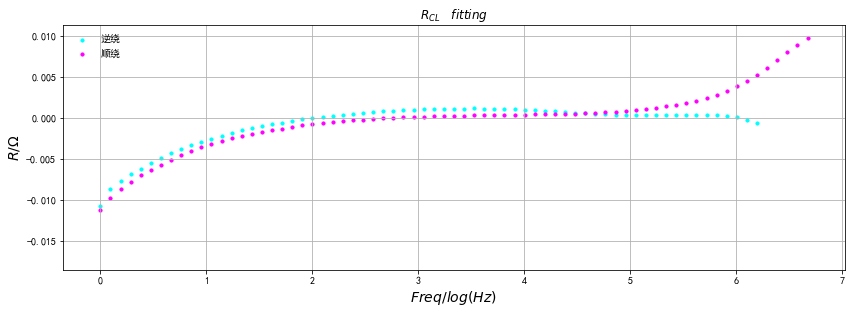

In [39]:
plt.subplots(figsize = (14, 4.5))
plt.scatter(fl[0: 66], R_CLn[0: 66],  c = 'cyan', s = 10, label = '逆绕')
plt.scatter(fl[0: 71], R_CLs[0: 71],  c = 'magenta', s = 10, label = '顺绕')

plt.title(r'$R_{CL}\quad fitting$')
plt.ylabel(r'$R/\Omega$', fontsize = 14)
plt.xlabel(r'$Freq/log(Hz)$', fontsize  =14)
plt.legend(frameon = False)
plt.grid()
plt.show()